In [47]:
library(readr)
rawdf = read_csv("aries_crash_data_2018.csv");
head(rawdf)

Parsed with column specification:
cols(
  .default = col_character(),
  INDEXING_NUMBER = col_double(),
  INDIVIDUAL_MR_RECORD = col_double(),
  PERSONNMB = col_double(),
  GENDERCDE = col_logical(),
  AGE_GRP = col_logical(),
  POSINVEHCDE = col_logical(),
  POSINVEHDESCR = col_logical(),
  EJECTTRAPCDE = col_logical(),
  EJECTTRAPDESCR = col_logical(),
  SAFETYEQUUSEDCDE = col_logical(),
  SAFETYEQUUSEDDESCR = col_logical(),
  SAFETYEQUEFFIND = col_logical(),
  INJSTATUSCDE = col_logical(),
  INJSTATUSDESCR = col_logical(),
  INJNATURECDE = col_logical(),
  INJNATUREDESCR = col_logical(),
  INJLOCCDE = col_logical(),
  INJLOCCDESCR = col_logical(),
  TESTGIVENCDE = col_logical(),
  TESTGIVENDESCR = col_logical()
  # ... with 26 more columns
)
See spec(...) for full column specifications.
Warning message:
“3547761 parsing failures.
 row          col           expected actual                        file
1852 STATEPROPIND 1/0/T/F/TRUE/FALSE      N 'aries_crash_data_2018.csv'
1862 STATEP

INDEXING_NUMBER,INDIVIDUAL_MR_RECORD,UNIT_MR_NUMBER,STATUSCDE,PERSONNMB,PERSONTYPECDE,PERSONTYPEDESCR,GENDERCDE,AGE_GRP,POSINVEHCDE,⋯,TRAVDIRDESCR,EMGERENCY_RUN,FIREIND,COLLEVENTCDE,COLLEVENTDESCR,PRECOLLACTCDE,PRECOLLACTDESCR,DISTRICT,DISTRICT_NUM,SUBDISTRICT
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
903091099001,903091099,01,AC,1,05,Owner Vehicle,NA,NA,NA,⋯,NA,N,N,01,Another Motor Vehicle,02,Backing,Greenfield,3,Indianapolis
903084265001,903084265,01,AC,1,05,Owner Vehicle,NA,NA,NA,⋯,NA,N,N,01,Another Motor Vehicle,02,Backing,Greenfield,3,Indianapolis
903085095001,903085095,01,AC,1,05,Owner Vehicle,NA,NA,NA,⋯,NA,N,N,01,Another Motor Vehicle,01,Going Straight,Greenfield,3,Indianapolis
903085099001,903085099,01,AC,1,05,Owner Vehicle,NA,NA,NA,⋯,NA,N,N,01,Another Motor Vehicle,01,Going Straight,Greenfield,3,Indianapolis
903091166002,903091166,01,AC,2,05,Owner Vehicle,NA,NA,NA,⋯,NA,N,N,01,Another Motor Vehicle,02,Backing,Greenfield,3,Indianapolis
903091586001,903091586,01,AC,1,05,Owner Vehicle,NA,NA,NA,⋯,NA,N,N,01,Another Motor Vehicle,02,Backing,Greenfield,3,Indianapolis


In [111]:
library(dplyr)
df <- rawdf %>%
    filter(PERSONTYPEDESCR %in% c("Pedal Cyclist","Pedestrian")) %>%
    group_by(COUNTYDESCR) %>%
    summarize(crashCount = n()) %>%
    rename(county = COUNTYDESCR)
head(df)

county,crashCount
<chr>,<int>
Adams,7
Allen,199
Bartholomew,49
Benton,1
Blackford,2
Boone,13


In [110]:
library(readxl)
library(stringr)

pops <- read_excel("2018_cntyest.xlsx") %>%
    select(1,3) %>%
    slice(-(1:2)) %>%
    rename(county=1,pop=2)

pops$county <- word(countyPop_df$county,1)

head(pops)

New names:
* `` -> ...4
* `` -> ...5
* `` -> ...6
* `` -> ...7
* `` -> ...8
* … and 8 more problems


county,pop
<chr>,<dbl>
Adams,35636
Allen,375351
Bartholomew,82753
Benton,8653
Blackford,11930
Boone,66999


In [113]:
df <- left_join(df,countyPop_df) %>%
    mutate(crashesPerCap = crashCount / pop * 100000)

head(df)

Joining, by = c("county", "pop")


county,crashCount,pop,crashesPerCap
<chr>,<int>,<dbl>,<dbl>
Adams,7,35636,19.64306
Allen,199,375351,53.01704
Bartholomew,49,82753,59.21235
Benton,1,8653,11.55669
Blackford,2,11930,16.76446
Boone,13,66999,19.40327


Warning message:
“Removed 2 rows containing missing values (position_stack).”

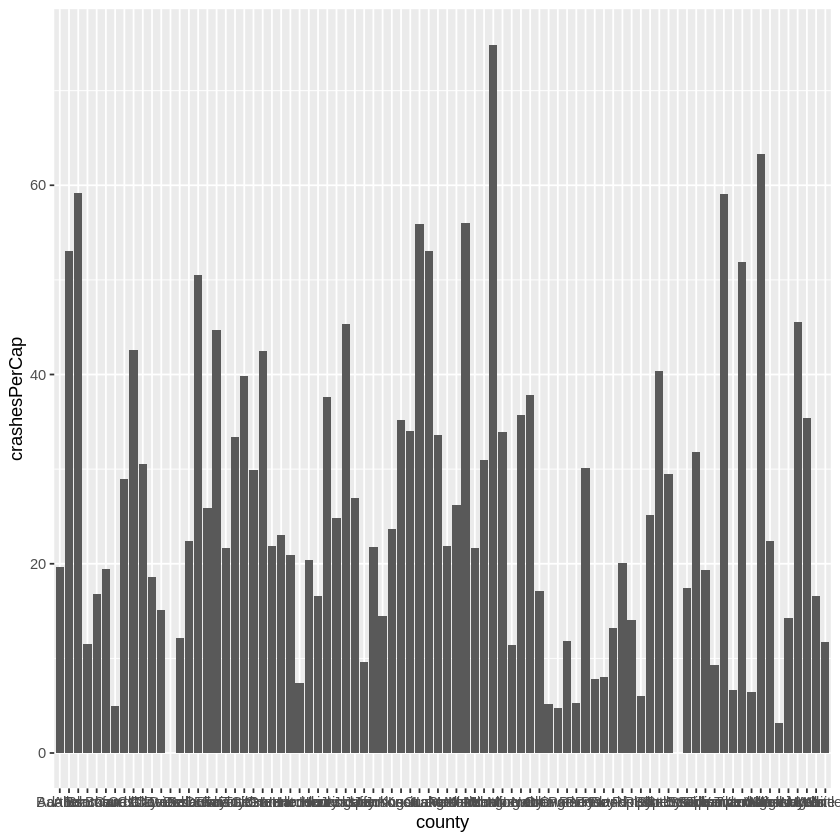

In [79]:
library(ggplot2)
ggplot(df, aes(x = county, y = crashesPerCap)) + geom_col()

In [114]:
healthRanks <- read_excel("2018RankingsIN.xls",sheet=2) %>%
    select(3,5,7) %>%
    slice(-(1:2)) %>%
    rename(county=...3,outcomeRank=...5,factorRank=...7)
    
head(healthRanks)

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...5
* `` -> ...7


county,outcomeRank,factorRank
<chr>,<chr>,<chr>
Adams,17,47
Allen,47,37
Bartholomew,42,11
Benton,32,17
Blackford,86,73
Boone,4,2


In [115]:
df <- left_join(df, healthRanks)

head(df)

Joining, by = "county"


county,crashCount,pop,crashesPerCap,outcomeRank,factorRank
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>
Adams,7,35636,19.64306,17,47
Allen,199,375351,53.01704,47,37
Bartholomew,49,82753,59.21235,42,11
Benton,1,8653,11.55669,32,17
Blackford,2,11930,16.76446,86,73
Boone,13,66999,19.40327,4,2


Warning message:
“Removed 2 rows containing missing values (geom_point).”

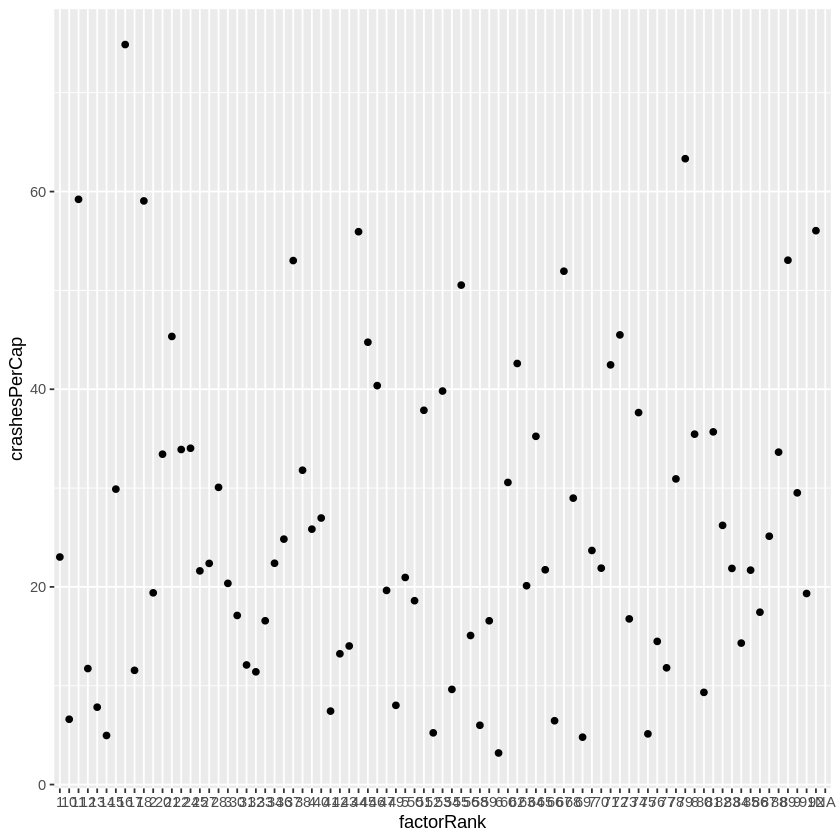

In [98]:
ggplot(df, aes(x=factorRank,y=crashesPerCap)) + geom_point()